# F1 optimal laptime with up to 10s of 120kW boost

In [1]:
# Put parent folder in the pythonpath
import sys,os,inspect
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))))))
import fastest_lap
from fastest_lap import KMH

import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

In [2]:
# Load vehicle
vehicle = "car"
fastest_lap.create_vehicle_from_xml(vehicle,"../../../../../database/vehicles/f1/ferrari-2022-australia.xml");

In [3]:
# Load track
track="catalunya"
fastest_lap.create_track_from_xml(track,"../../../../../database/tracks/catalunya/catalunya.xml");
s=fastest_lap.track_download_data(track,"arclength");

In [4]:
# Compute optimal laptime
options  = "<options>"
options += "    <output_variables>"
options += "        <prefix>run/</prefix>"
options += "    </output_variables>"
options += "    <control_variables>"
options += "        <rear-axle.boost optimal_control_type=\"full-mesh\">"
options += "            <dissipation> 0.0e-4 </dissipation>"
options += "        </rear-axle.boost>"
options += "    </control_variables>"
options += "    <integral_constraints>"
options += "        <boost-time>"
options += "            <lower_bound> 0.0 </lower_bound>"
options += "            <upper_bound> 10.0 </upper_bound>"
options += "        </boost-time>"
options += "    </integral_constraints> "
options += "    <print_level> 5 </print_level>"
options += "</options>"

run = fastest_lap.download_variables(*fastest_lap.optimal_laptime(vehicle,track,s,options));
fastest_lap.delete_variable("run/*")

## Throttle (blue) and boost (purple)

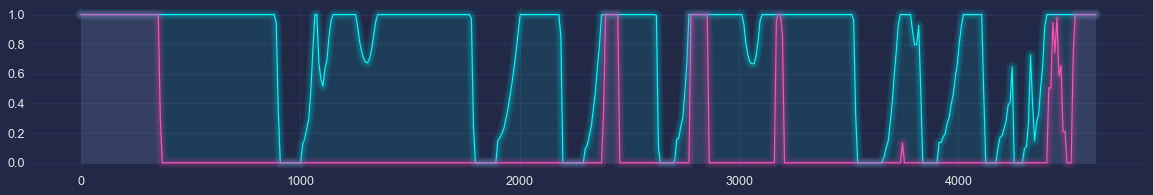

In [5]:
plt.figure(figsize=(20,3))
plt.plot(s,np.maximum(0,run["chassis.throttle"]),label='throttle');
plt.plot(s,run["rear-axle.boost"], label='boost')
mplcyberpunk.add_glow_effects()